
# Posterior contours

I am running KiDS, KiDSxBOSS, KiDSxBOSSxPlanck, with  $\alpha_{B,M} \in [-2,2], [-0.5,3]$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer
import pandas as pd
from numpy.random import normal, random, multivariate_normal

In [2]:
#sigma8=c A_s
c = ((10**3.044)/10**10)/0.8111
#As = c sigma8
#sigma8 sim 0.775
np.log10((10**10) *(c*0.775))

3.0242273011054057







# Loading chains and creating pandas data frames

## KiDS-1000, BAO & RSD, KiDS-1000 +BAO & RSD chains

In [3]:
def loadMontePythonChain(directory, params_out = None):
    # load data
    data = np.loadtxt(directory + 'chain_NS__accepted.txt')
    # load parameter names
    names = np.loadtxt(directory + '/chain.paramnames', dtype=str, delimiter='\t').T[0]
    names = np.concatenate((['weight','mloglkl'], names))
    # remove trailing spaces
    for idx, name in enumerate(names):
        if name[-1] == ' ':
            names[idx] = name[:-1]
    if params_out:
        if 'delta_c' in names:
            params_out = params_out.copy()
            params_out.append(r'$\delta_{\rm c}$')
        # add omega_m if needed
        if r'$\omega_{\rm m}$' in params_out:
            params_out = params_out.copy()
            params_out.remove(r'$\omega_{\rm m}$')
            chain = pd.DataFrame(data, columns = params_out)
            chain[r'$\omega_{\rm m}$'] = chain[r'$\Omega_{\rm m}$'] * chain[r'$h$']**2
        else:
            chain = pd.DataFrame(data, columns = params_out)
    else:
        chain = pd.DataFrame(data, columns = names)
    return(chain)


params_out5 = ['weight','mloglkl', r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$',
               r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$log k_{s}$', r'$A_{\rm IA}$' ,r'$c_{\rm min}$',
               '$A_{\rm planck}$', r'$z_{reio}$','YHe', r'$H_{\rm 0}$', r'$A_{\rm s}$',
               r'$\Omega_{\rm m}$', r'$\sigma8$', '$D_{z1}$', '$D_{z2}$', '$D_{z3}$', '$D_{z4}$', 
               '$D_{z5}$']

params_out_mod2 = ['weight','mloglkl',r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', 
                  r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$log k_{s}$', 
                  r'$A_{\rm IA}$', r'$\Omega_{\rm m}$', r'$\sigma8$' ,r'$c_{\rm min}$', r'$D_{z1}$',
                  r'$D_{z2}$',r'$D_{z3}$',r'$D_{z4}$',r'$D_{z5}$']

params_out4 = ['weight','mloglkl',r'$\Omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\Omega_{\rm b}$', 
               r'$n_{\rm s}$', r'$h$', r'$log k_{s}$', r'$\alpha_{B}$', r'$\alpha_{M}$',
               r'$\Omega_{\rm m}$', r'$\sigma8$']

params_planck_hor = ['weight','mloglkl',r'$\tau_{reio}$', r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$',
               r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$A_{\rm planck}$', 
               r'$z_{reio}$', 'YHe', r'$H_{\rm 0}$', r'$A_{\rm s}$', r'$\Omega_{\rm m}$', r'$\sigma8$']


params_out3 = ['weight','mloglkl',r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', r'$n_{\rm s}$',
               r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$log k_{s}$', r'$A_{\rm IA}$',
               r'$\Omega_{\rm m}$', r'$\sigma8$', r'$c_{\rm min}$' ,r'$D_{z1}$',r'$D_{z2}$',r'$D_{z3}$',
               r'$D_{z4}$',r'$D_{z5}$']

params_nu = ['weight','mloglkl',r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', r'$n_{\rm s}$',
               r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$log k_{s}$', r'$A_{\rm IA}$', r'$\Omega_{\rm m}$', 
             r'$\sigma8$', r'$c_{\rm min}$', r'$D_{z1}$',r'$D_{z2}$',r'$D_{z3}$',r'$D_{z4}$',r'$D_{z5}$']


main_path = '/Users/matteograsso/Desktop/MSc_thesis/Paper_notebook/my_chains/'

#full combination, 2018
CMBxKiDSxBOSS = loadMontePythonChain(main_path + 'CMBxKiDSxBOSS/', params_out=params_out5)
CMBxKiDSxBOSS_less_screen = loadMontePythonChain(main_path + 'CMBxKiDSxBOSS_less_screen/', params_out=params_out5)
BAORSD = loadMontePythonChain(main_path + 'BAORSD_0.076_scr/',
                                params_out=params_out4) #calculated with the screening !
#just Planck Horndeski, 2018 
c_planck_hor = loadMontePythonChain('/Users/matteograsso/Desktop/MSc_thesis/Paper_notebook/my_chains/planck_hor_2018/', 
                                    params_out=params_planck_hor)

#K1KBAO_nu = loadMontePythonChain(main_path + 'KiDSxBOSS_nu/', params_out=params_nu) 
K1KBAO_mod_hiclass = loadMontePythonChain('/Users/matteograsso/Desktop/Definitive_plots/mod_hi_class_K1KBAO/', params_out=params_out_mod2)
#K1KBAO = loadMontePythonChain(main_path + 'Hor_BAORSD_broader_priors/', params_out=params_out3)

In [4]:
#planck LCDM
planck_data = np.loadtxt('Planck (LCDM)/output_multinest.txt')
names = [r'$\omega_{\rm cdm}$', r'$\omega_{\rm b}$', '$h$', r'$n_{\rm s}$', 'S_8_in', 'tau', 'A_planck', r'$S_{\rm 8}$', r'$\sigma8$', 'A_s', r'$\Omega_{\rm m}$', 'Omega_nu', 'Omega_Lambda', 'Theta', 'pior', 'likelihood', 'post', 'weights']
planck_pdframe = pd.DataFrame(planck_data, columns = names)

In [10]:
c_planck_hor

,weight,mloglkl,$\tau_{reio}$,$\omega_{\rm cdm}$,$ln10^{10}A_s$,$\omega_{\rm b}$,$n_{\rm s}$,$h$,$\alpha_{B}$,$\alpha_{M}$,$A_{\rm planck}$,$z_{reio}$,YHe,$H_{\rm 0}$,$A_{\rm s}$,$\Omega_{\rm m}$,$\sigma8$,$S_{\rm 8}$
0,1.411509e-99,736.2162,0.048099,0.129111,3.090701,0.023577,0.921963,0.652405,-1.268279,2.894093,1.007803,6.930954,0.248341,65.24046,2.199248,0.360247,0.863395,0.946126
1,1.512174e-99,736.1448,0.077165,0.121599,3.174313,0.023892,0.950967,0.682798,-0.588138,1.991993,1.037745,9.518875,0.248467,68.27983,2.391038,0.313452,0.884522,0.904135
2,1.930408e-99,735.8981,0.024311,0.122078,3.007758,0.020502,0.921670,0.651556,0.303518,2.216744,1.009144,4.528511,0.246991,65.15558,2.024197,0.337374,0.836156,0.886712
3,2.132983e-99,735.7958,0.042360,0.103884,2.952714,0.022093,0.989417,0.737300,0.764228,-0.116034,0.998930,6.269760,0.247721,73.73000,1.915787,0.232927,0.738021,0.650306
4,2.227589e-99,735.7499,0.009072,0.119071,3.022022,0.022968,0.924319,0.687381,1.343801,0.938040,1.032436,1.904354,0.248092,68.73806,2.053276,0.301981,0.829384,0.832118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7449,2.033304e-04,499.4731,0.055902,0.118563,3.045655,0.022687,0.971021,0.683268,1.369129,-0.464961,1.000426,7.762009,0.247974,68.32681,2.102380,0.303936,0.826272,0.831675
7450,2.455166e-04,499.2846,0.055764,0.118194,3.044016,0.022663,0.975099,0.683747,1.870687,1.923159,1.001328,7.747269,0.247964,68.37469,2.098937,0.302671,0.883113,0.887035
7451,2.035274e-04,499.4721,0.048856,0.118368,3.035737,0.022672,0.968012,0.683193,1.665859,-0.364187,1.002577,7.041855,0.247968,68.31930,2.081632,0.303553,0.827820,0.832708
7452,3.216729e-04,499.0144,0.051873,0.118114,3.030164,0.022648,0.972121,0.683543,1.461333,-0.309630,0.998393,7.354904,0.247958,68.35428,2.070062,0.302648,0.822526,0.826148


In [5]:
BAORSD[r'$\omega_{\rm cdm}$'] = BAORSD[r'$\Omega_{\rm cdm}$']*pow(BAORSD[r'$h$'],2)
BAORSD[r'$\omega_{\rm b}$'] = BAORSD[r'$\Omega_{\rm b}$']*pow(BAORSD[r'$h$'],2)
BAORSD;

### Adding $S_{8}$ column

In [6]:
CMBxKiDSxBOSS[r'$S_{\rm 8}$'] = CMBxKiDSxBOSS[r'$\sigma8$']*(CMBxKiDSxBOSS[r'$\Omega_{\rm m}$']/0.3)**.5
c_planck_hor[r'$S_{\rm 8}$'] = c_planck_hor[r'$\sigma8$']*(c_planck_hor[r'$\Omega_{\rm m}$']/0.3)**.5
CMBxKiDSxBOSS_less_screen[r'$S_{\rm 8}$'] = CMBxKiDSxBOSS_less_screen[r'$\sigma8$']*(CMBxKiDSxBOSS_less_screen[r'$\Omega_{\rm m}$']/0.3)**.5
K1KBAO_mod_hiclass[r'$S_{\rm 8}$'] = K1KBAO_mod_hiclass[r'$\sigma8$']*(K1KBAO_mod_hiclass[r'$\Omega_{\rm m}$']/0.3)**.5
BAORSD[r'$S_{\rm 8}$'] = BAORSD[r'$\sigma8$']*(BAORSD[r'$\Omega_{\rm m}$']/0.3)**.5
#K1KBAO[r'$S_{\rm 8}$'] = K1KBAO[r'$\sigma8$']*(K1KBAO[r'$\Omega_{\rm m}$']/0.3)**.5
#K1KBAO_nu[r'$S_{\rm 8}$'] = K1KBAO_nu[r'$\sigma8$']*(K1KBAO_nu[r'$\Omega_{\rm m}$']/0.3)**.5

### Plotting posterior contours

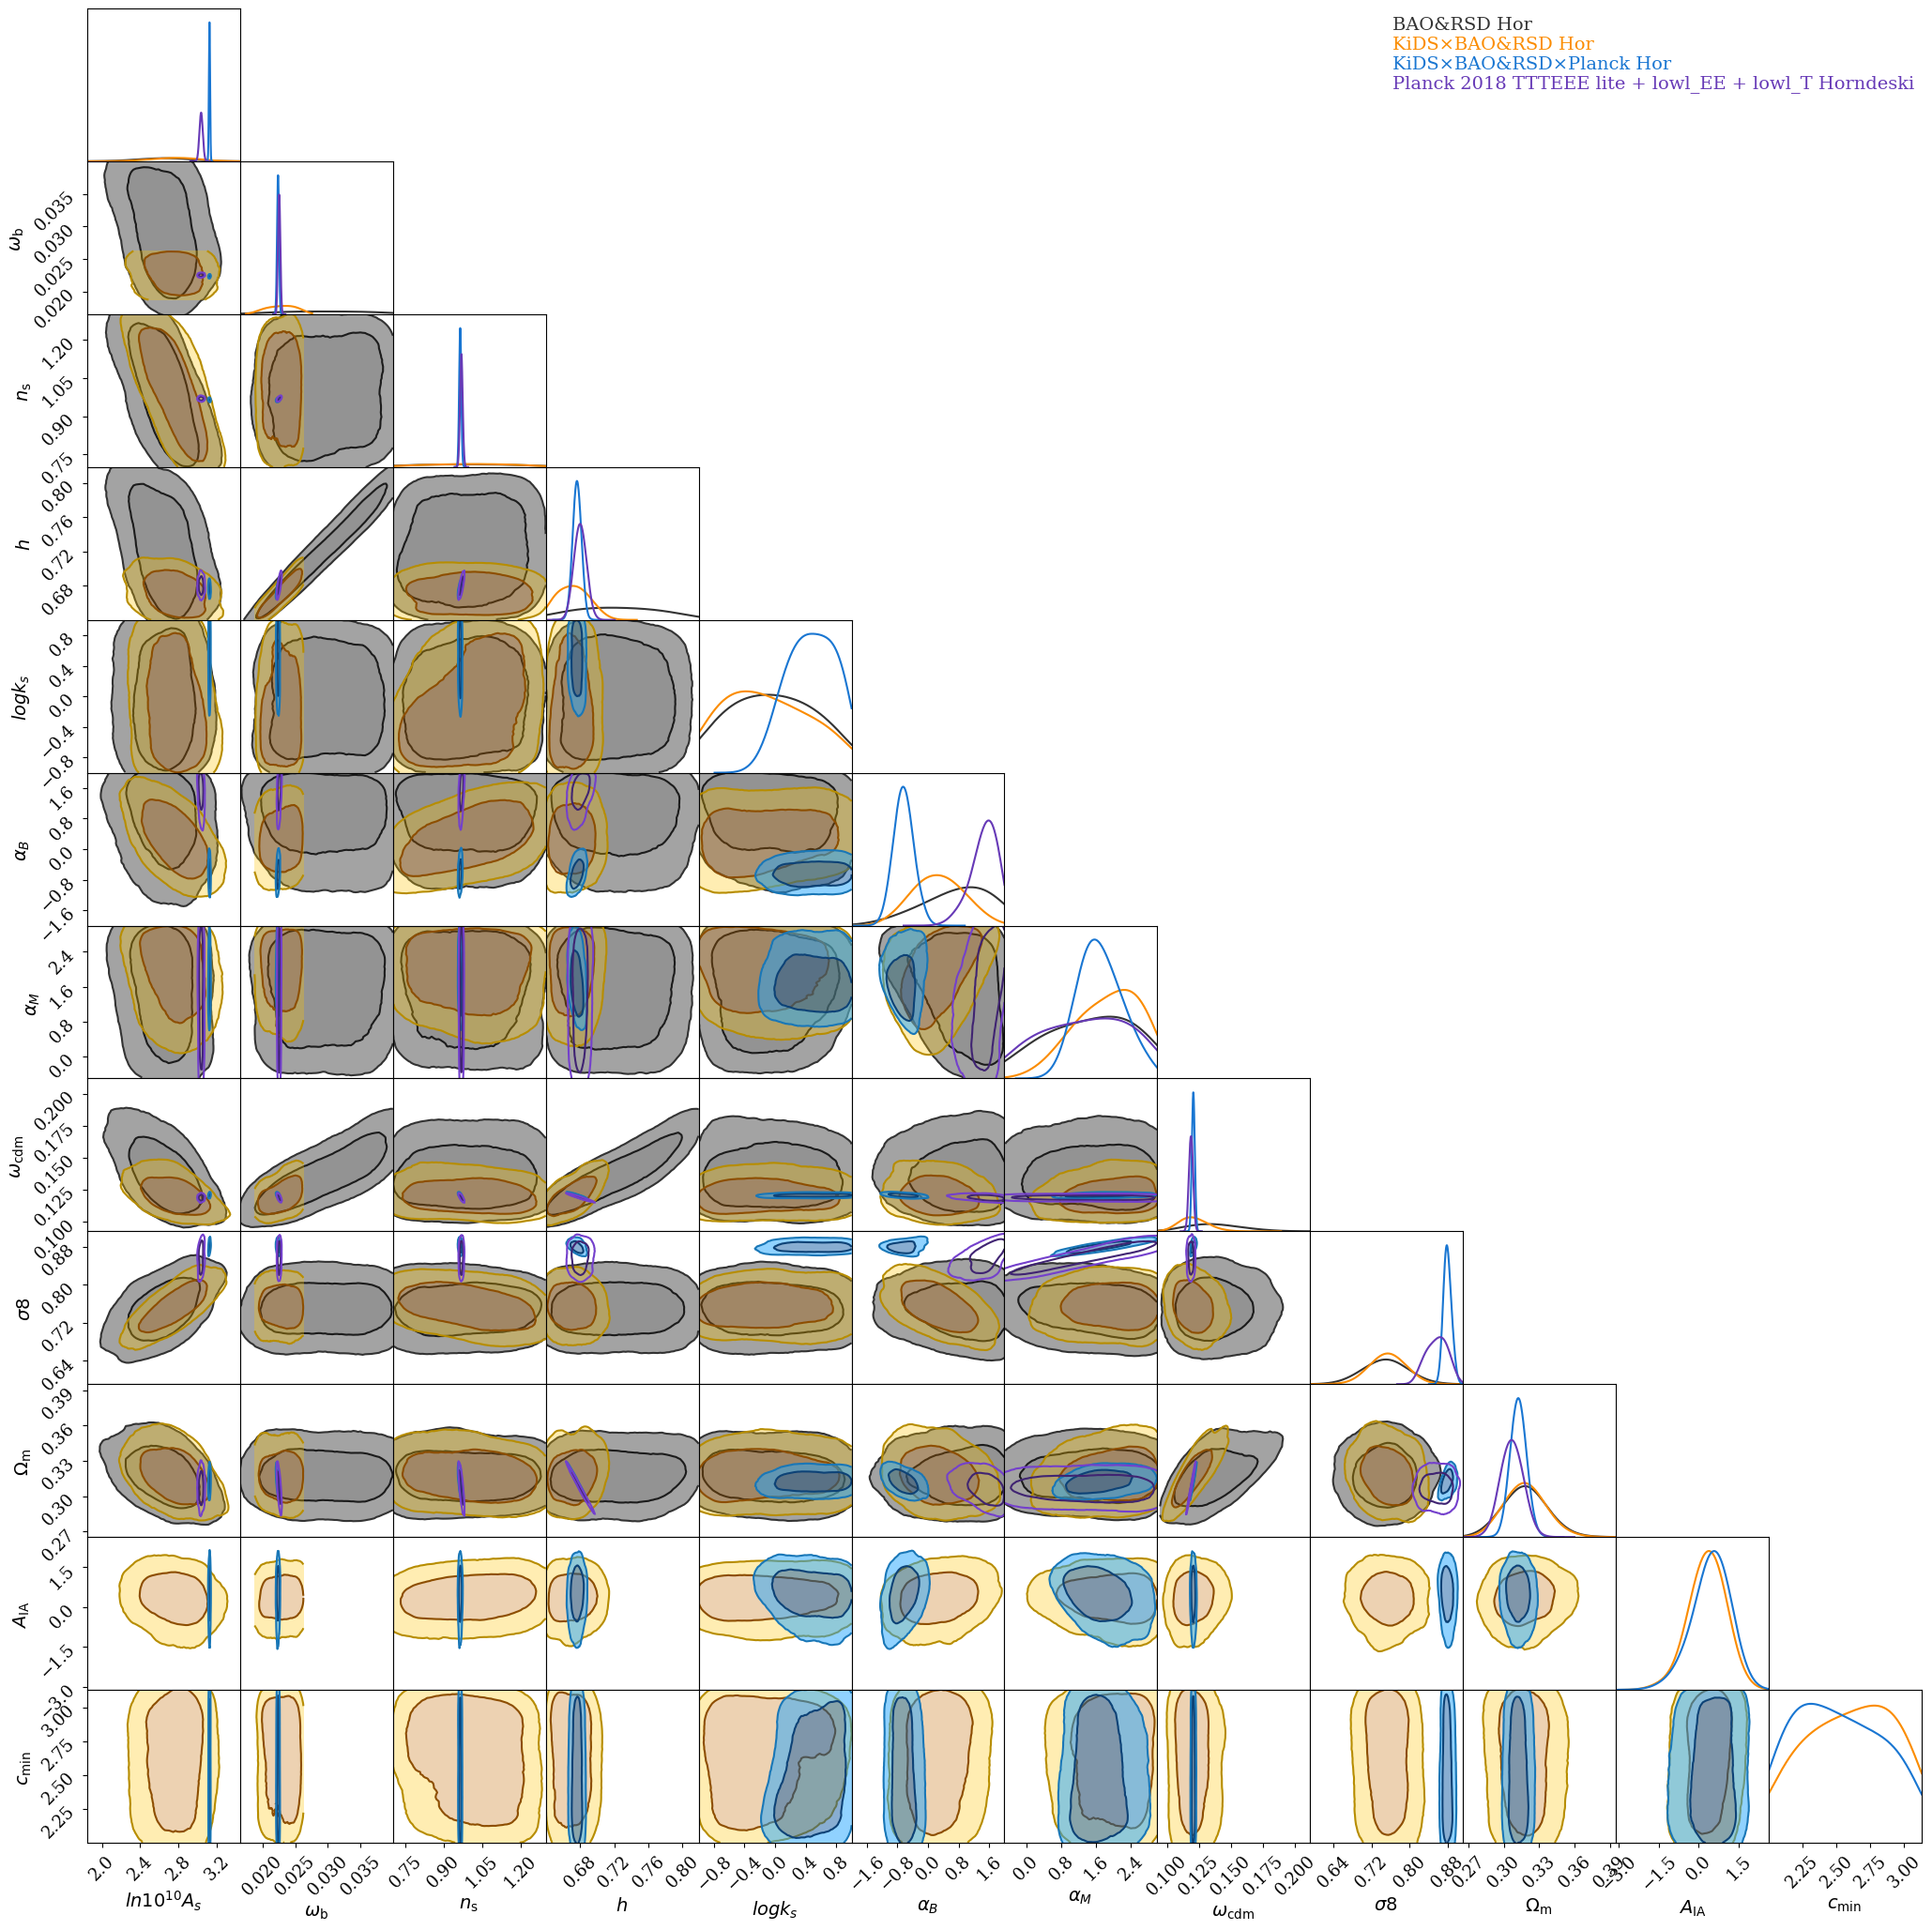

In [ ]:
#### cols = [r'$\Omega_{\rm m}$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$S_{\rm 8}$'] 
#, 'k_s'] #r'$\sigma8$']

cols_tot = [r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$',
               r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', 'k_s', r'$A_{IA}$', r'$c_{min}$',
               '$A_{\rm planck}$', r'$z_{reio}$','YHe', r'$H_{\rm 0}$', r'$A_{\rm s}$',
               r'$\Omega_{\rm m}$', r'$\sigma8$', '$D_{z1}$', '$D_{z2}$', '$D_{z3}$', '$D_{z4}$', 
               '$D_{z5}$']

cols_boss = [r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', 
               r'$n_{\rm s}$', r'$h$', r'$log k_{s}$', r'$\alpha_{B}$', r'$\alpha_{M}$',
               r'$\omega_{\rm cdm}$', r'$\sigma8$', r'$\Omega_{\rm m}$']#r'$\Omega_{\rm b}$',

cols_planck_hor = [r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', 
               r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$',
               r'$\omega_{\rm cdm}$', r'$\sigma8$', r'$\Omega_{\rm m}$']#r'$\Omega_{\rm b}$',

#r'$\Omega_{\rm b}$'
#r'$\Omega_{\rm m}$'
cols_kids_boss = [r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', 
                  r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$log k_{s}$', 
                  r'$A_{\rm IA}$', r'$\Omega_{\rm m}$', r'$\sigma8$' ,r'$c_{\rm min}$']
                  #,r'$D_{z1}$',r'$D_{z2}$',r'$D_{z3}$',r'$D_{z4}$',r'$D_{z5}$']

cols2 = [r'$\Omega_{\rm m}$', r'$\alpha_{B}$', r'$\alpha_{M}$']
cols_pl = [r'$\Omega_{\rm m}$', r'$S_{\rm 8}$']
cols_pl_2015 = [r'$\alpha_{B}$', r'$\alpha_{M}$']
cols_alphas = [ r'$\alpha_{B}$', r'$\alpha_{M}$']
#cols_pl = [r'$\Omega_{\rm m}$', r'$S_{\rm 8}$']
c = ChainConsumer()

c.add_chain(BAORSD[cols_boss], weights=BAORSD['weight'], name = 'BAO&RSD Hor', kde = 1.5, color='black', shade=True)
c.add_chain(K1KBAO_mod_hiclass[cols_kids_boss], weights=K1KBAO_mod_hiclass['weight'], name = 'KiDS×BAO&RSD Hor', kde = 1.5, shade =True, shade_alpha=.3, color='orange')
c.add_chain(CMBxKiDSxBOSS[cols_kids_boss], weights=CMBxKiDSxBOSS['weight'], name = 'KiDS×BAO&RSD×Planck Hor', kde = 1.5, color='blue', shade = True)
#c.add_chain(CMBxKiDSxBOSS_less_screen[cols], weights=CMBxKiDSxBOSS_less_screen['weight'], name = 'KiDSxBOSSxPlanck (less screening) Hor', kde = 1.5, color='red', shade = True)
c.add_chain(c_planck_hor[cols_planck_hor], weights=c_planck_hor['weight'], name = 'Planck 2018 TTTEEE lite + lowl_EE + lowl_T Horndeski', kde = 1.5)
#c.add_chain(planck_pdframe[cols_pl], weights=planck_pdframe['weights'], name = 'Planck LCDM (TTTEEE + low E)', color='green', kde = 1.5, shade=True, shade_alpha=1.)
#c.add_chain(K1KBAO[cols], weights=K1KBAO['weight'], name = 'normal', color='black', kde = 1.5, shade_alpha=.3)
#c.add_chain(K1KBAO_nu[cols], weights=K1KBAO_nu['weight'], 
#name = 'KiDSxBOSS (massive neutrinos)', color='purple', kde = 1.5, shade_alpha=.3) #this chi2 diverges! Don't use it

c.configure(plot_hists=True, shade_gradient=1.0, diagonal_tick_labels=True, label_font_size=14, tick_font_size=13, serif=True, legend_color_text=True, linewidths=1.5, statistics="max", usetex = False)

fig = c.plotter.plot(filename = '/Users/matteograsso/Desktop/main_params.eps',
    
    extents={ 
    r'$S_{\rm 8}$' : (0.6,1.),
    r'$\alpha_{B}$':  (-2,2),
    r'$\alpha_{M}$' : (-.5,3)
    }
                    )
fig.set_size_inches(5 + fig.get_size_inches())  # Resize fig for doco. You don't need this.
plt.show()

# Checking that there's no bug in the chain and transforming $D_{z_i}$ into $\delta_{z_i}$

In [16]:
prior_dz1 = normal(0, 0.99, size=100000)
prior_dz2 = normal(0.181, 0.99, size=100000)
prior_dz3 = normal(1.110, 0.99, size=100000)
prior_dz4 = normal(1.395,  0.99, size=100000)
prior_dz5 = normal(-1.265, 0.99, size=100000)
prior_c2 = pd.DataFrame({r'$D_{z1}$': prior_dz1,r'$D_{z2}$':prior_dz2,r'$D_{z3}$':prior_dz3, r'$D_{z4}$':prior_dz4, r'$D_{z5}$':prior_dz5 })

In [22]:
"""
from numpy.random import normal, random, multivariate_normal

cols = [r'$D_{z1}$',r'$D_{z2}$',r'$D_{z3}$',r'$D_{z4}$',r'$D_{z5}$']

c = ChainConsumer()
c.add_chain(c1[cols], weights=c1['weight'], name = 'Horndeski PCl', color='b', kde=1.5, shade=True, shade_alpha=0.6)
c.add_chain(prior_c2[cols], name = 'prior', color='grey', kde=1.5, shade=True, shade_alpha=0.6)
c.configure(plot_hists=True, shade_gradient=1.0, diagonal_tick_labels=True, label_font_size=14, tick_font_size=13, serif=True, legend_color_text=True, linewidths=1.5, statistics="max", usetex = False)
fig = c.plotter.plot()
fig.set_size_inches(5 + fig.get_size_inches())  # Resize fig for doco. You don't need this.
plt.show()
"""
;

''

## Transforming $D_{z_i}$ into $\delta_{z_i}$

Here we want to pass from the $D_{zi}$ to $\delta_{zi}$. This can be done as follows

\begin{equation}
\vec{\delta_{z}} = A \cdot \vec{D_{z}} 
\end{equation}
where $A$ is a correlation matrix

In [2]:
#get D_z from \delta 
corrmat_D_z = np.loadtxt('/Users/matteograsso/Desktop/DATA/kids1000_pcl/DATA/SOM_cov_multiplied.asc')
A = np.linalg.cholesky(corrmat_D_z)
A_inv = np.linalg.inv(A)
delta_z = np.transpose([0.005,0.002,-0.016,-0.014, 0.007])
D_z = A_inv.dot(delta_z)
D_z

array([ 0.4724345 ,  0.07607199, -1.51910726, -1.72984234,  1.50828377])

In [17]:
#we load the "corrmat_D_z" matrix, then we get its inverse (at least I guess so), and then we finally get the \delta's
corrmat_D_z = np.loadtxt('/Users/matteograsso/Desktop/kids1000_pcl/DATA/SOM_cov_multiplied.asc')
L_matrix_D_z = np.linalg.cholesky(corrmat_D_z)
D_z = np.transpose(c1[[r'$D_{z1}$', r'$D_{z2}$', r'$D_{z3}$', r'$D_{z4}$', r'$D_{z5}$']])
#notice that in the prior_c2 dataframe the columns D_zi corresponds to the D_zi PRIORS!
D_z_priors = np.transpose(prior_c2[[r'$D_{z1}$', r'$D_{z2}$', r'$D_{z3}$', r'$D_{z4}$', r'$D_{z5}$']])
D_z_corr = L_matrix_D_z.dot(D_z)
D_z_corr_priors = L_matrix_D_z.dot(D_z_priors)

In [19]:
#add delta_zi columns to the c1 data frame 
delta_z1 = D_z_corr[0]
delta_z2 = D_z_corr[1]
delta_z3 = D_z_corr[2]
delta_z4 = D_z_corr[3]
delta_z5 = D_z_corr[4]
c_K1K[r'$\delta_{z1}$'] = delta_z1
c_K1K[r'$\delta_{z2}$'] = delta_z2
c_K1K[r'$\delta_{z3}$'] = delta_z3
c_K1K[r'$\delta_{z4}$'] = delta_z4
c_K1K[r'$\delta_{z5}$'] = delta_z5

In [20]:
#checking that everthing is fine 
c_K1K[[r'$\delta_{z1}$', r'$\delta_{z2}$', r'$\delta_{z3}$', r'$\delta_{z4}$',r'$\delta_{z5}$']]

,$\delta_{z1}$,$\delta_{z2}$,$\delta_{z3}$,$\delta_{z4}$,$\delta_{z5}$
0,0.051678,-0.039208,-0.053922,-0.016688,-0.001813
1,0.004364,-0.001091,-0.018586,-0.023560,-0.029188
2,-0.018594,0.004533,0.041457,0.002531,0.028319
3,-0.025098,0.027760,0.041242,-0.029943,-0.035207
4,0.007496,0.042152,-0.030939,-0.015486,0.000032
...,...,...,...,...,...
5347,0.001923,-0.005962,0.000388,0.010176,-0.012286
5348,0.002912,0.000183,0.014250,0.013798,-0.011389
5349,-0.009081,-0.005670,0.013912,0.014975,-0.010063
5350,-0.006303,-0.001747,0.014996,0.014191,-0.006335


In [21]:
#adding delta_zi columns to the c1 data frame. We do that by transforming the D_z priors into the \delta_z ones
prior_delta_z1 = D_z_corr_priors[0]
prior_delta_z2 = D_z_corr_priors[1]
prior_delta_z3 = D_z_corr_priors[2]
prior_delta_z4 = D_z_corr_priors[3]
prior_delta_z5 = D_z_corr_priors[4]
prior_c2[r'$\delta_{z1}$'] = prior_delta_z1
prior_c2[r'$\delta_{z2}$'] = prior_delta_z2
prior_c2[r'$\delta_{z3}$'] = prior_delta_z3
prior_c2[r'$\delta_{z4}$'] = prior_delta_z4
prior_c2[r'$\delta_{z5}$'] = prior_delta_z5

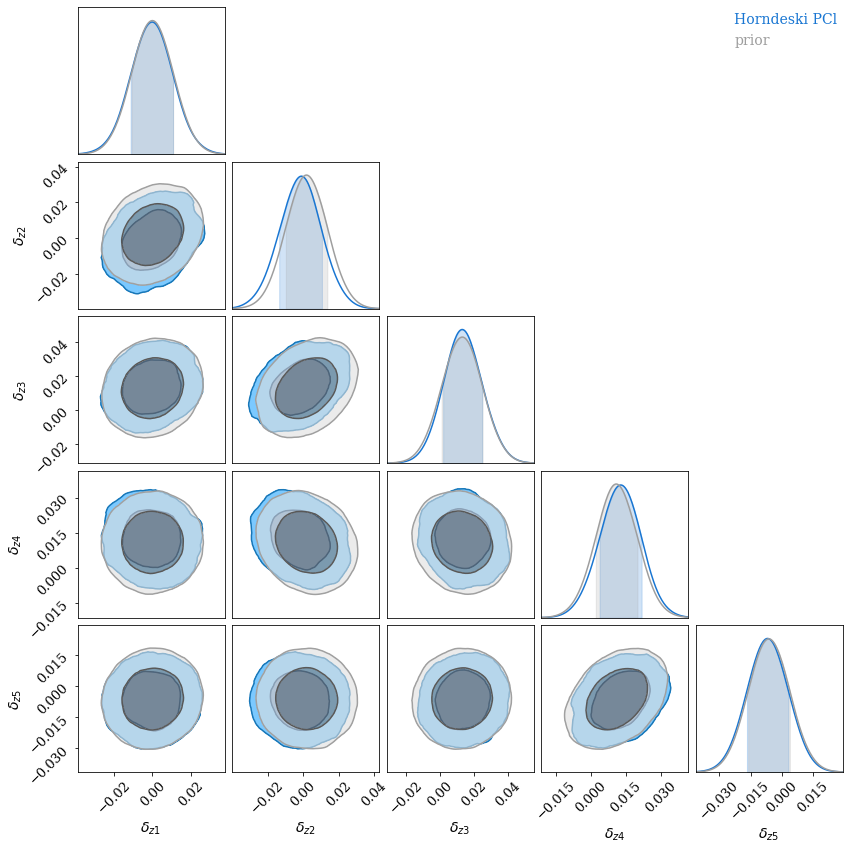

In [22]:
cols = [r'$\delta_{z1}$',r'$\delta_{z2}$',r'$\delta_{z3}$',r'$\delta_{z4}$',r'$\delta_{z5}$']
c = ChainConsumer()
c.add_chain(c_K1K[cols], weights=c_K1K['weight'], name = 'Horndeski PCl', color='b', kde=1.5, shade=True, shade_alpha=0.6)
c.add_chain(prior_c2[cols], name = 'prior', color='grey', kde=1.5, shade=True, shade_alpha=0.6)
c.configure(plot_hists=True, shade_gradient=1.0, diagonal_tick_labels=True, label_font_size=14, tick_font_size=13, serif=True, legend_color_text=True, linewidths=1.5, statistics="max", usetex = False)
fig = c.plotter.plot(filename = '/Users/matteograsso/Desktop/delta_shifts.pdf')
fig.set_size_inches(5 + fig.get_size_inches())  # Resize fig for doco. You don't need this.
plt.show()

## Plotting all of the parameters

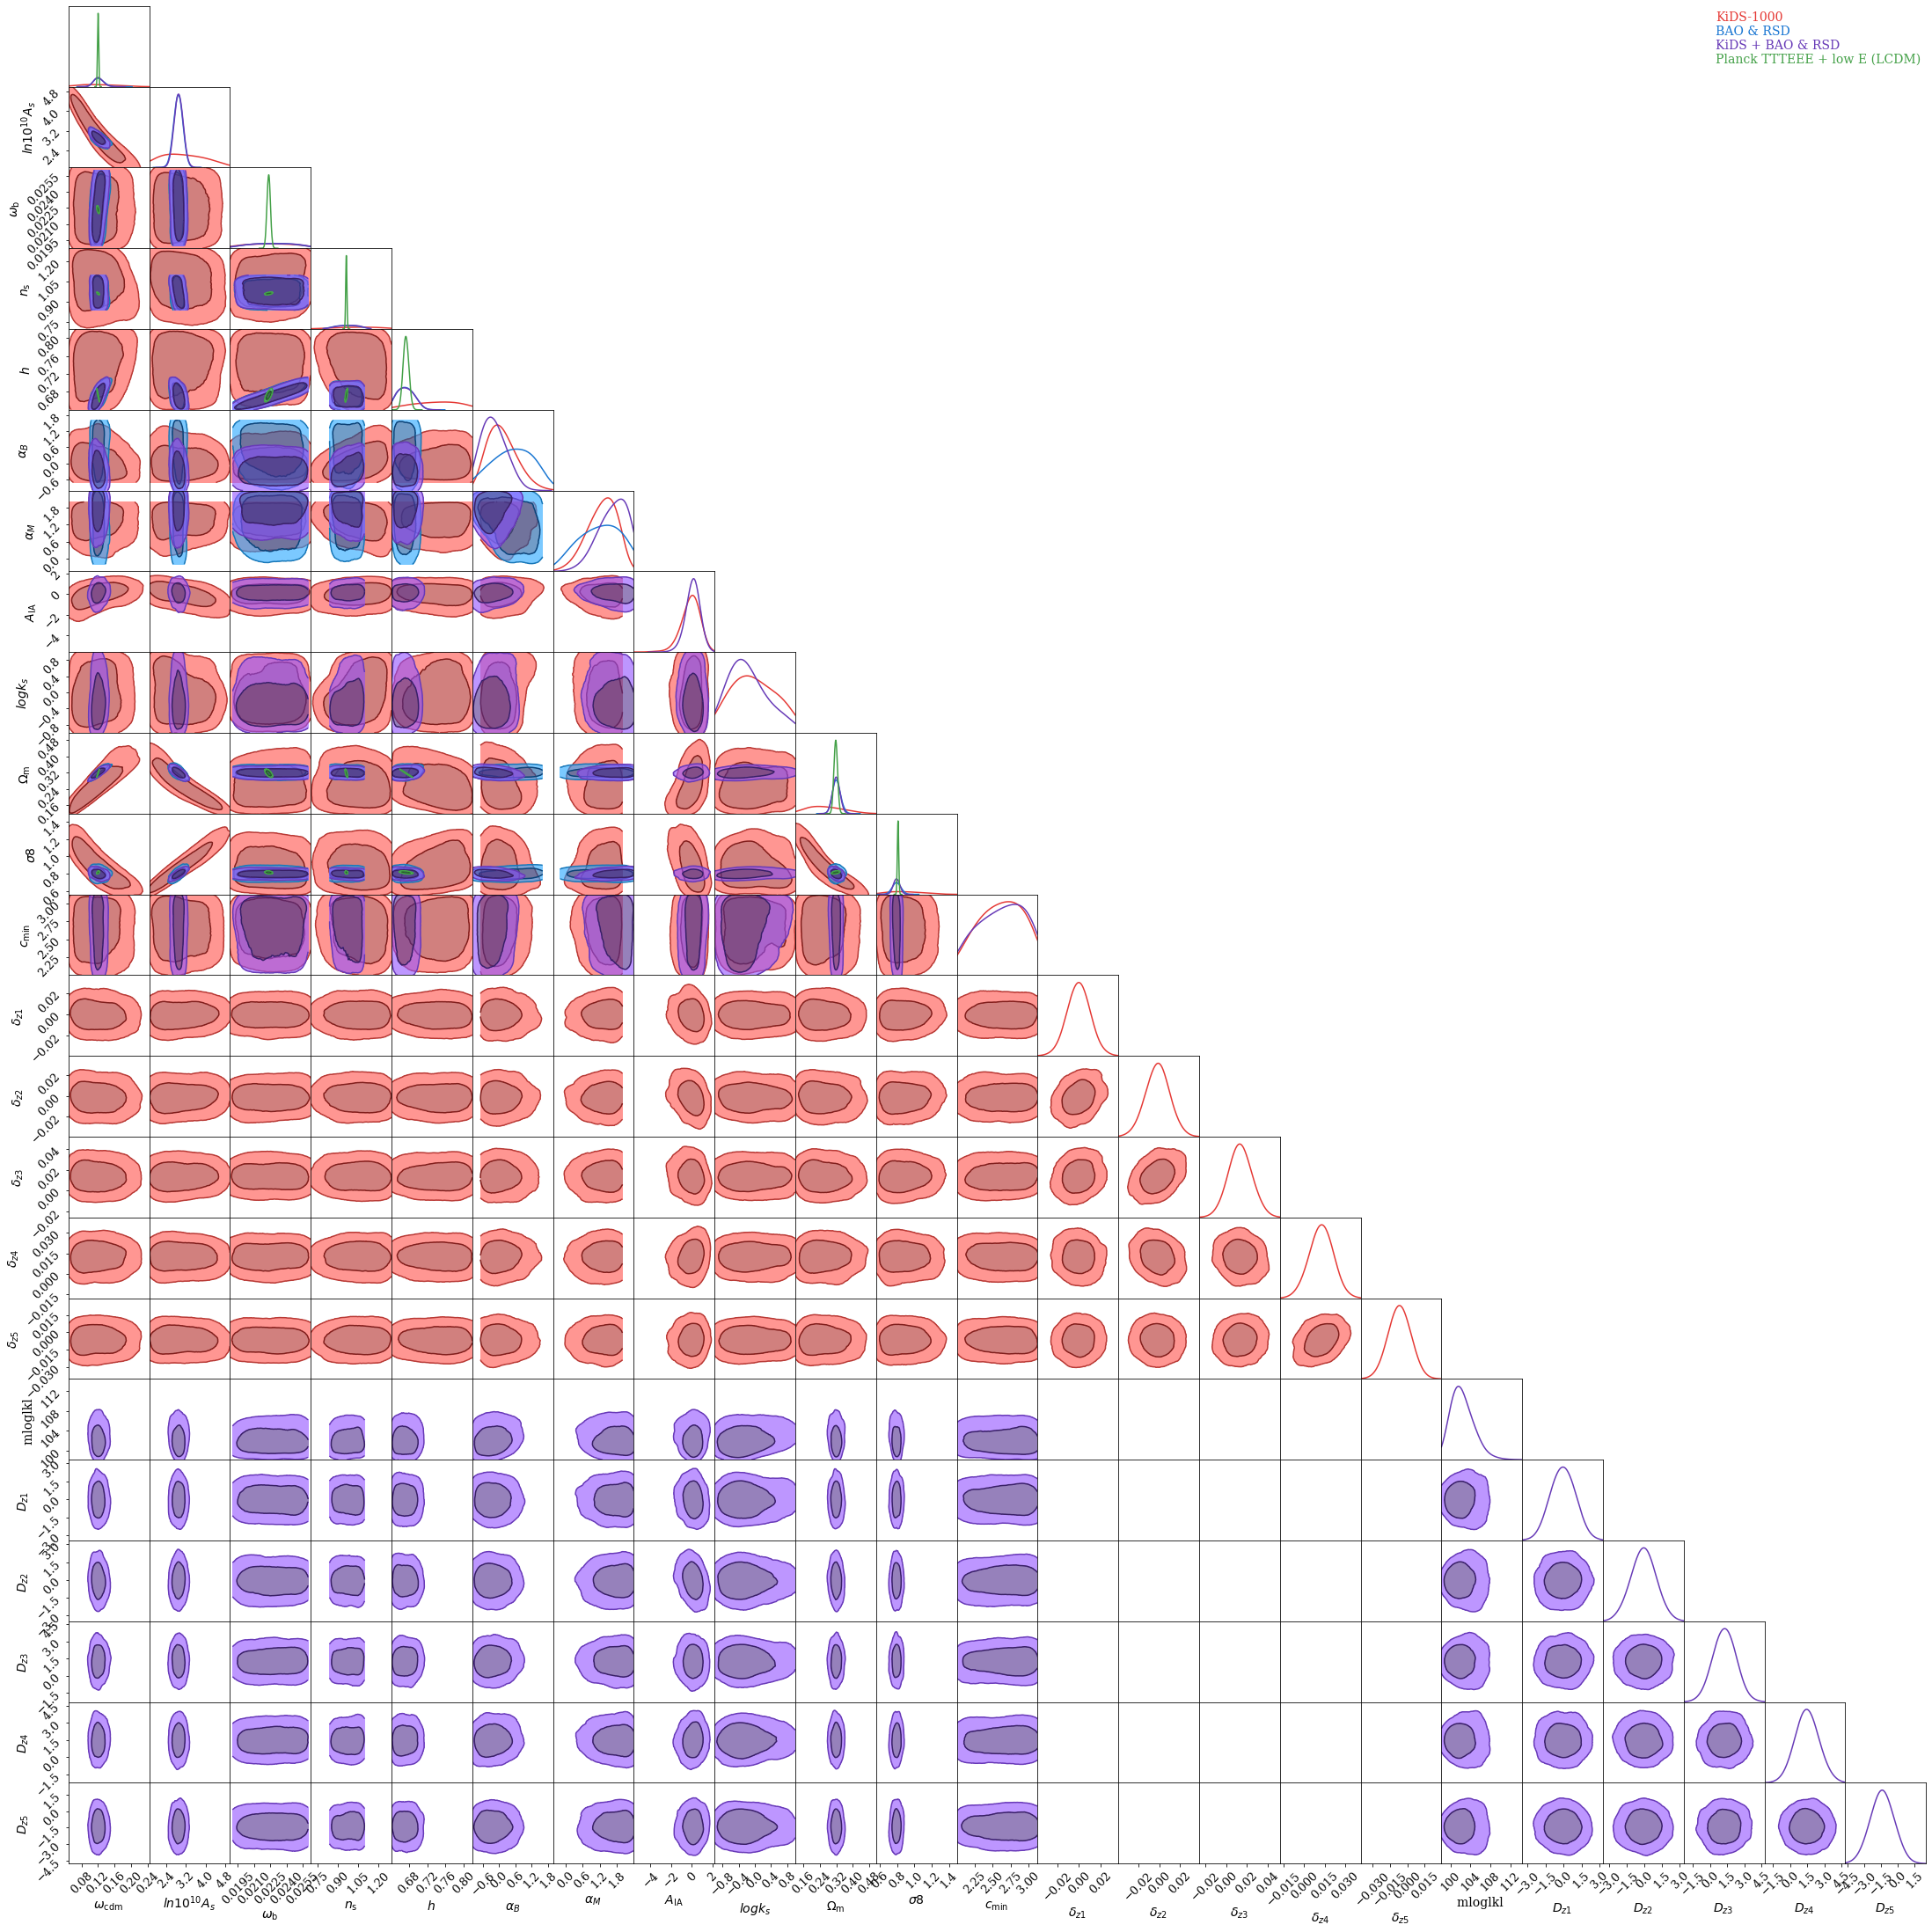

In [23]:
cols1 = [r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$A_{\rm IA}$', r'$log k_{s}$', r'$\Omega_{\rm m}$', r'$\sigma8$', r'$c_{\rm min}$', r'$\delta_{z1}$', r'$\delta_{z2}$', r'$\delta_{z3}$', r'$\delta_{z4}$', r'$\delta_{z5}$']
cols2 = [r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$\Omega_{\rm m}$', r'$\sigma8$']
cols3 = [r'$\omega_{\rm cdm}$', r'$\omega_{\rm b}$', r'$h$', r'$n_{\rm s}$', r'$\sigma8$', r'$\Omega_{\rm m}$']
#cols4 = [r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$c_{\rm min}$' , r'$A_{\rm IA}$', r'$log k_{s}$', r'$\Omega_{\rm m}$', r'$\sigma8$']
cols4 = [r'$\omega_{\rm cdm}$', r'$ln10^{10}A_s$', r'$\omega_{\rm b}$', r'$n_{\rm s}$', r'$h$', r'$\alpha_{B}$', r'$\alpha_{M}$', r'$c_{\rm min}$' , r'$A_{\rm IA}$', r'$log k_{s}$', r'$\Omega_{\rm m}$', r'$\sigma8$']
c = ChainConsumer()
c.add_chain(c_Hor[cols1], weights=c_Hor['weight'], name = 'Horndeski Cosmic Shear P$\mathcal{C}_{l}$', color='r', kde=1.5, shade=True, shade_alpha=0.6)
#c.add_chain(c_BAORSD[cols2], weights=c_BAORSD['weight'], name = 'BAO & RSD', color='b', kde=1.5, shade=True, shade_alpha=0.6)
#c.add_chain(c_K1KBAO[cols4], weights=c_K1KBAO['weight'], name = 'KiDS + BAO & RSD', color='purple', kde=1.5, shade=True, shade_alpha=0.6)
c.add_chain(planck_pdframe[cols3], weights= planck_pdframe['weights'], name = 'Planck TTTEEE + low E (LCDM)', color = 'green', kde = 1.5, shade = True, shade_alpha = 0.6)
c.configure(plot_hists=True, shade_gradient=1.0, diagonal_tick_labels=True, label_font_size=14, tick_font_size=13, serif=True, legend_color_text=True, linewidths=1.5, statistics="max", usetex = False)
c.plotter.plot(filename = '/Users/matteograsso/Desktop/my_chains/all_params.pdf')
plt.show()